In [ ]:
Ques1 answer-

In [1]:
import pandas as pd 
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")


In [195]:
df=pd.read_csv("F:\Glass Identification.csv")
df


,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [196]:
df.shape

(213, 11)

In [197]:
#Let's remove duplicates first ,this will also help to work better on outliers

In [198]:
df.drop_duplicates(inplace=True)

In [199]:
df.shape

(213, 11)

In [200]:
#check for any null
df.isnull().sum()

1          0
1.52101    0
13.64      0
4.49       0
1.10       0
71.78      0
0.06       0
8.75       0
0.00       0
0.00.1     0
1.1        0
dtype: int64

In [201]:
df.describe()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [202]:
#observations
#No Nan's Present
#standard deviation< mean/average
#All except quality are continuous data
#quality is discrete data type
#Q1,Q2,Q3,Q4 seems to be in line with some deviations

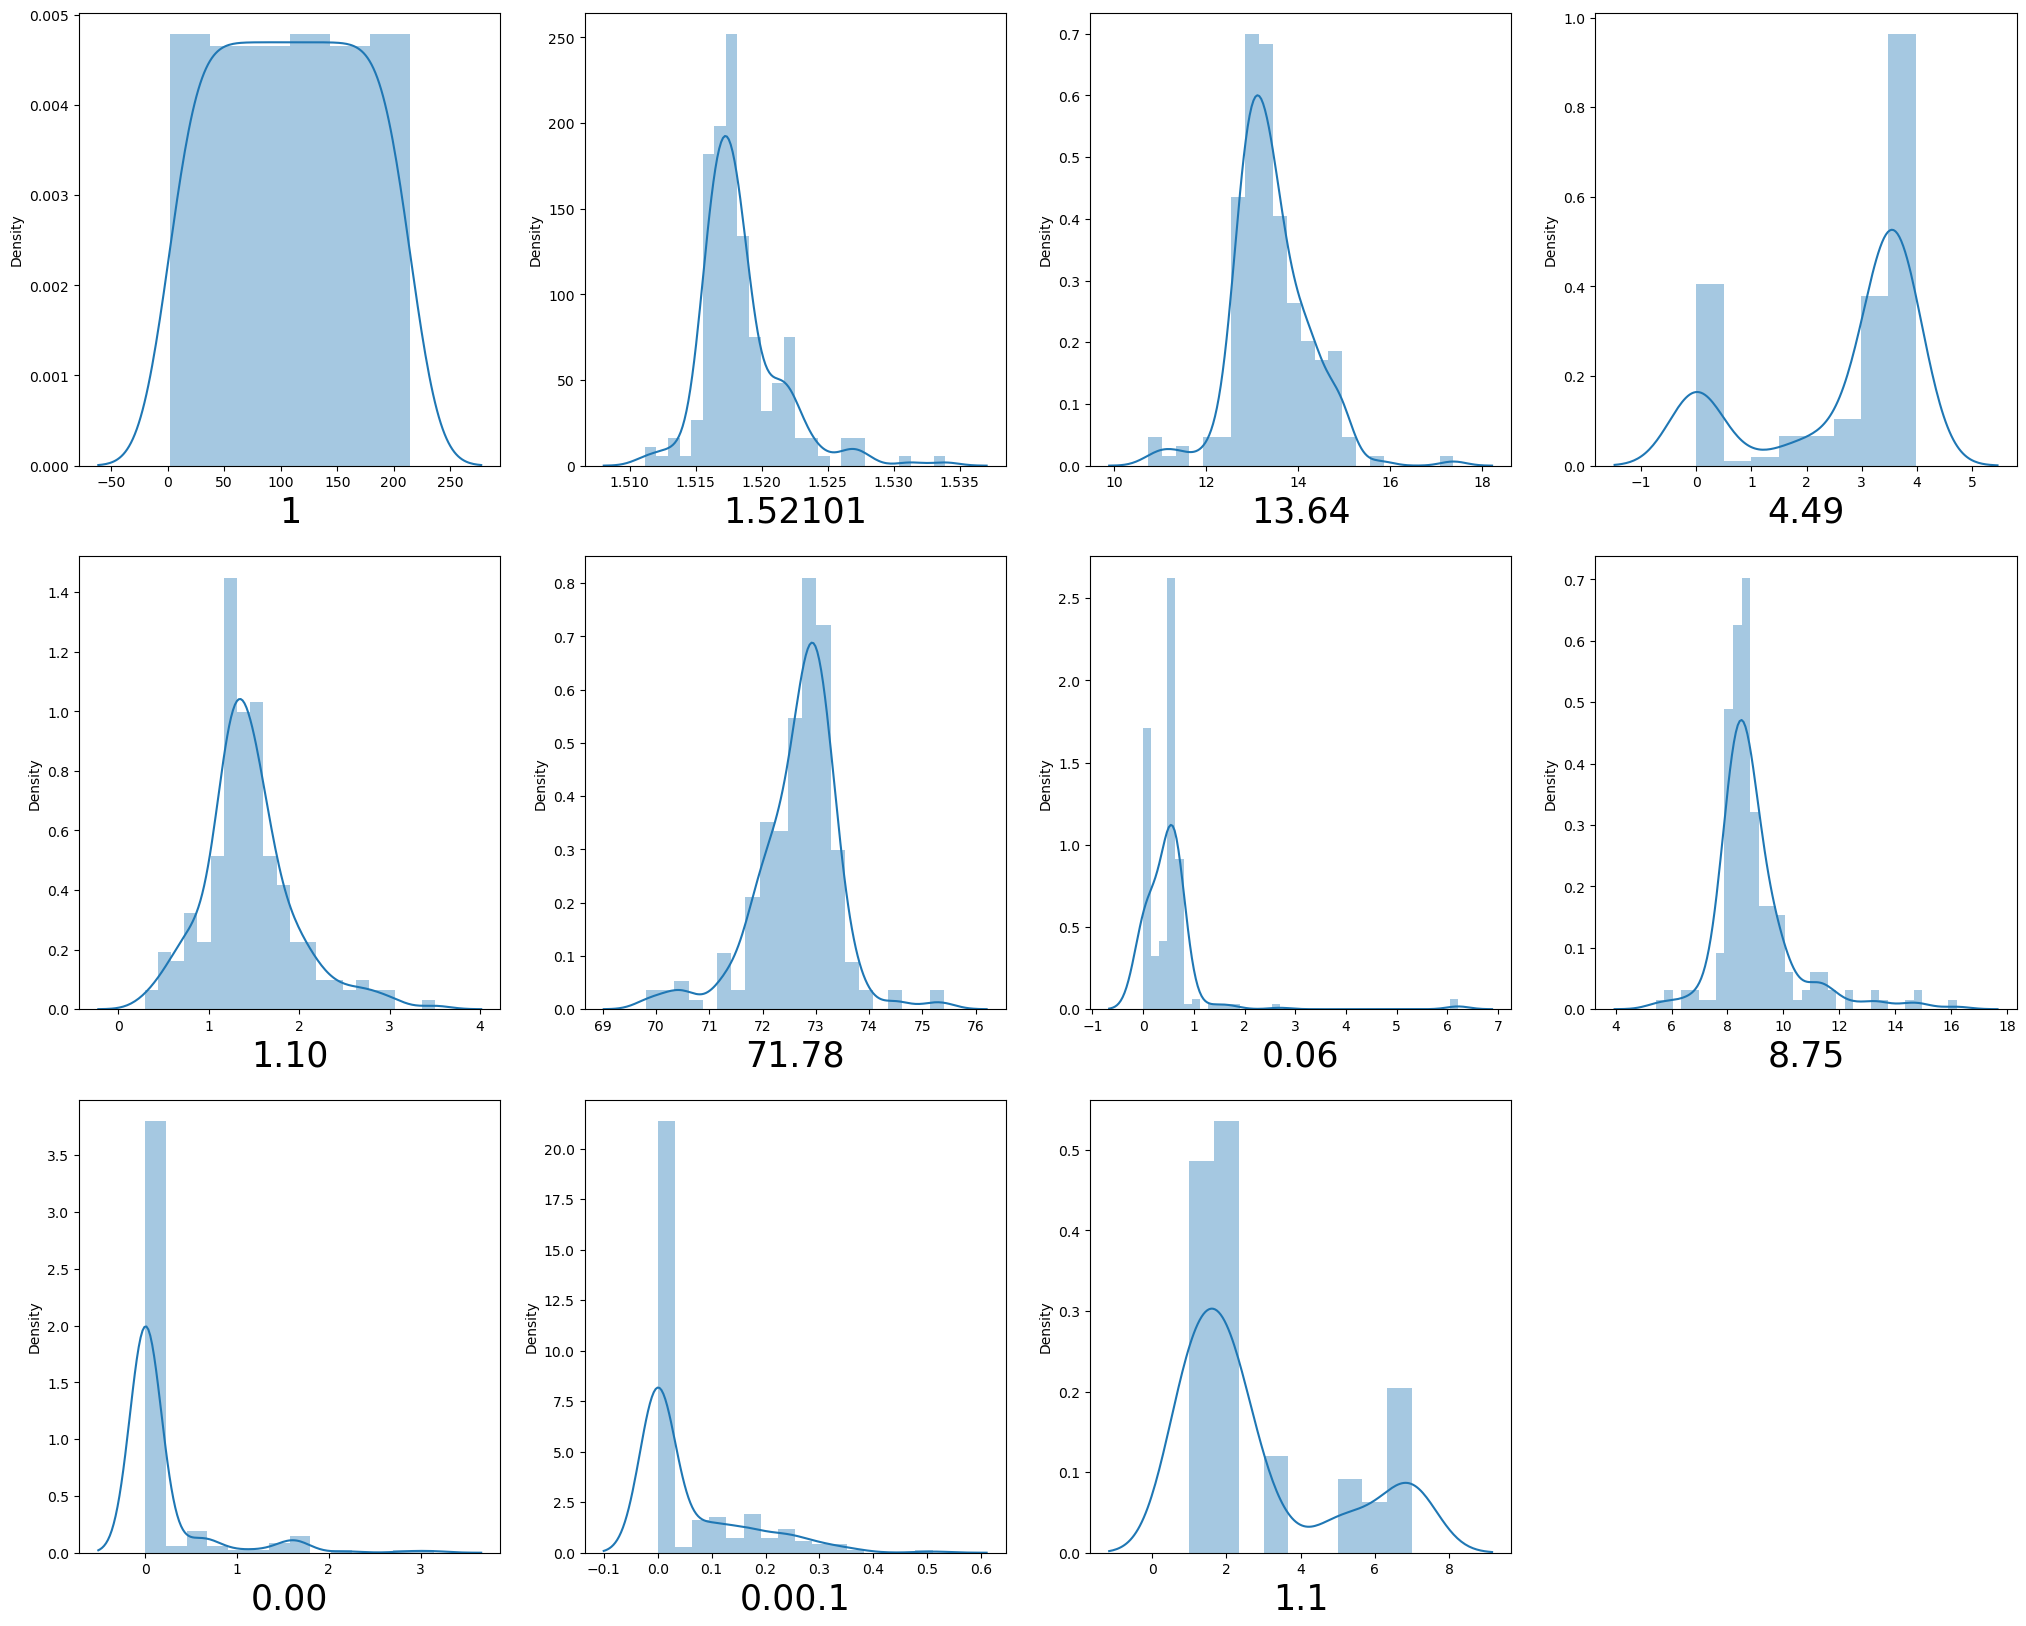

In [203]:
plt.figure(figsize=(25,20))
plot=1

for column in df:
   if plot<=12:
       a=plt.subplot(3,4,plot)
       sns.distplot(df[column])
       plt.xlabel(column, fontsize=25)
    
   plot +=1 
plt.show()

In [204]:
#here we can see some  outliers here 
 



In [205]:
#A hit map for more clarification:

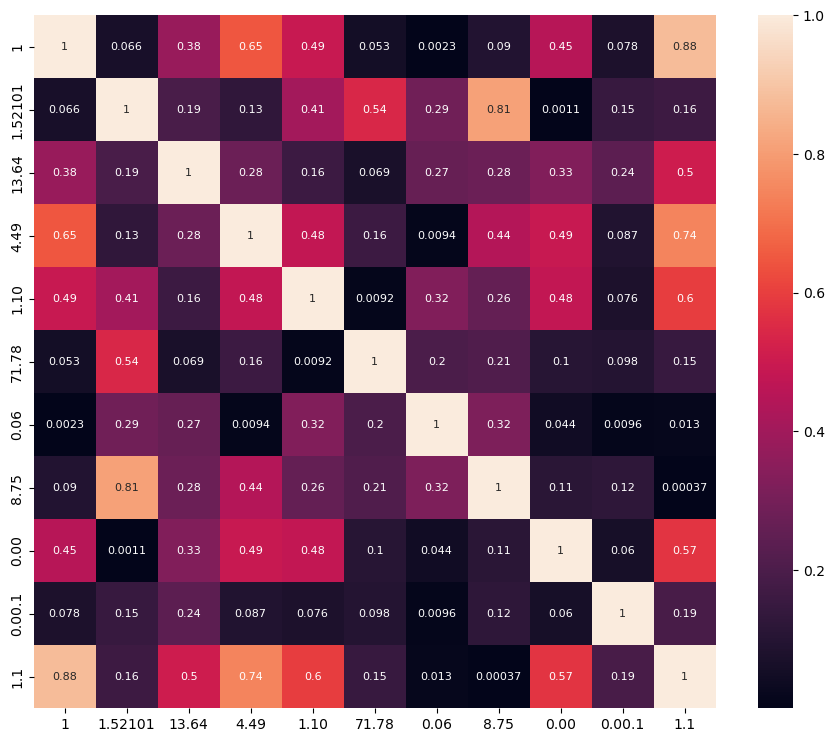

In [206]:
dfheat= df.corr().abs()
plt.figure(figsize=(11,9))
sns.heatmap(dfheat, annot=True, annot_kws={'size':8})
plt.show()

In [207]:
# Adjusting outliers through z score method

In [208]:
from scipy.stats import zscore
score= zscore(df)
absscore=np.abs(score)

filtering= (absscore<5).all(axis=1)
df=df[filtering]
df.describe()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,106.903846,1.518266,13.424038,2.740385,1.428510,72.699567,0.441250,8.933606,0.151106,0.056154,2.754808
std,61.648453,0.002686,0.799303,1.395668,0.477142,0.707770,0.336963,1.292465,0.418477,0.096457,2.097267
min,2.000000,1.511150,11.020000,0.000000,0.290000,69.890000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,53.750000,1.516528,12.922500,2.270000,1.190000,72.330000,0.127500,8.262500,0.000000,0.000000,1.000000
50%,105.500000,1.517670,13.305000,3.480000,1.360000,72.810000,0.550000,8.600000,0.000000,0.000000,2.000000
75%,159.250000,1.519120,13.840000,3.602500,1.620000,73.100000,0.610000,9.157500,0.000000,0.100000,3.000000
max,214.000000,1.527770,17.380000,3.980000,3.500000,75.410000,2.700000,14.960000,2.200000,0.510000,7.000000


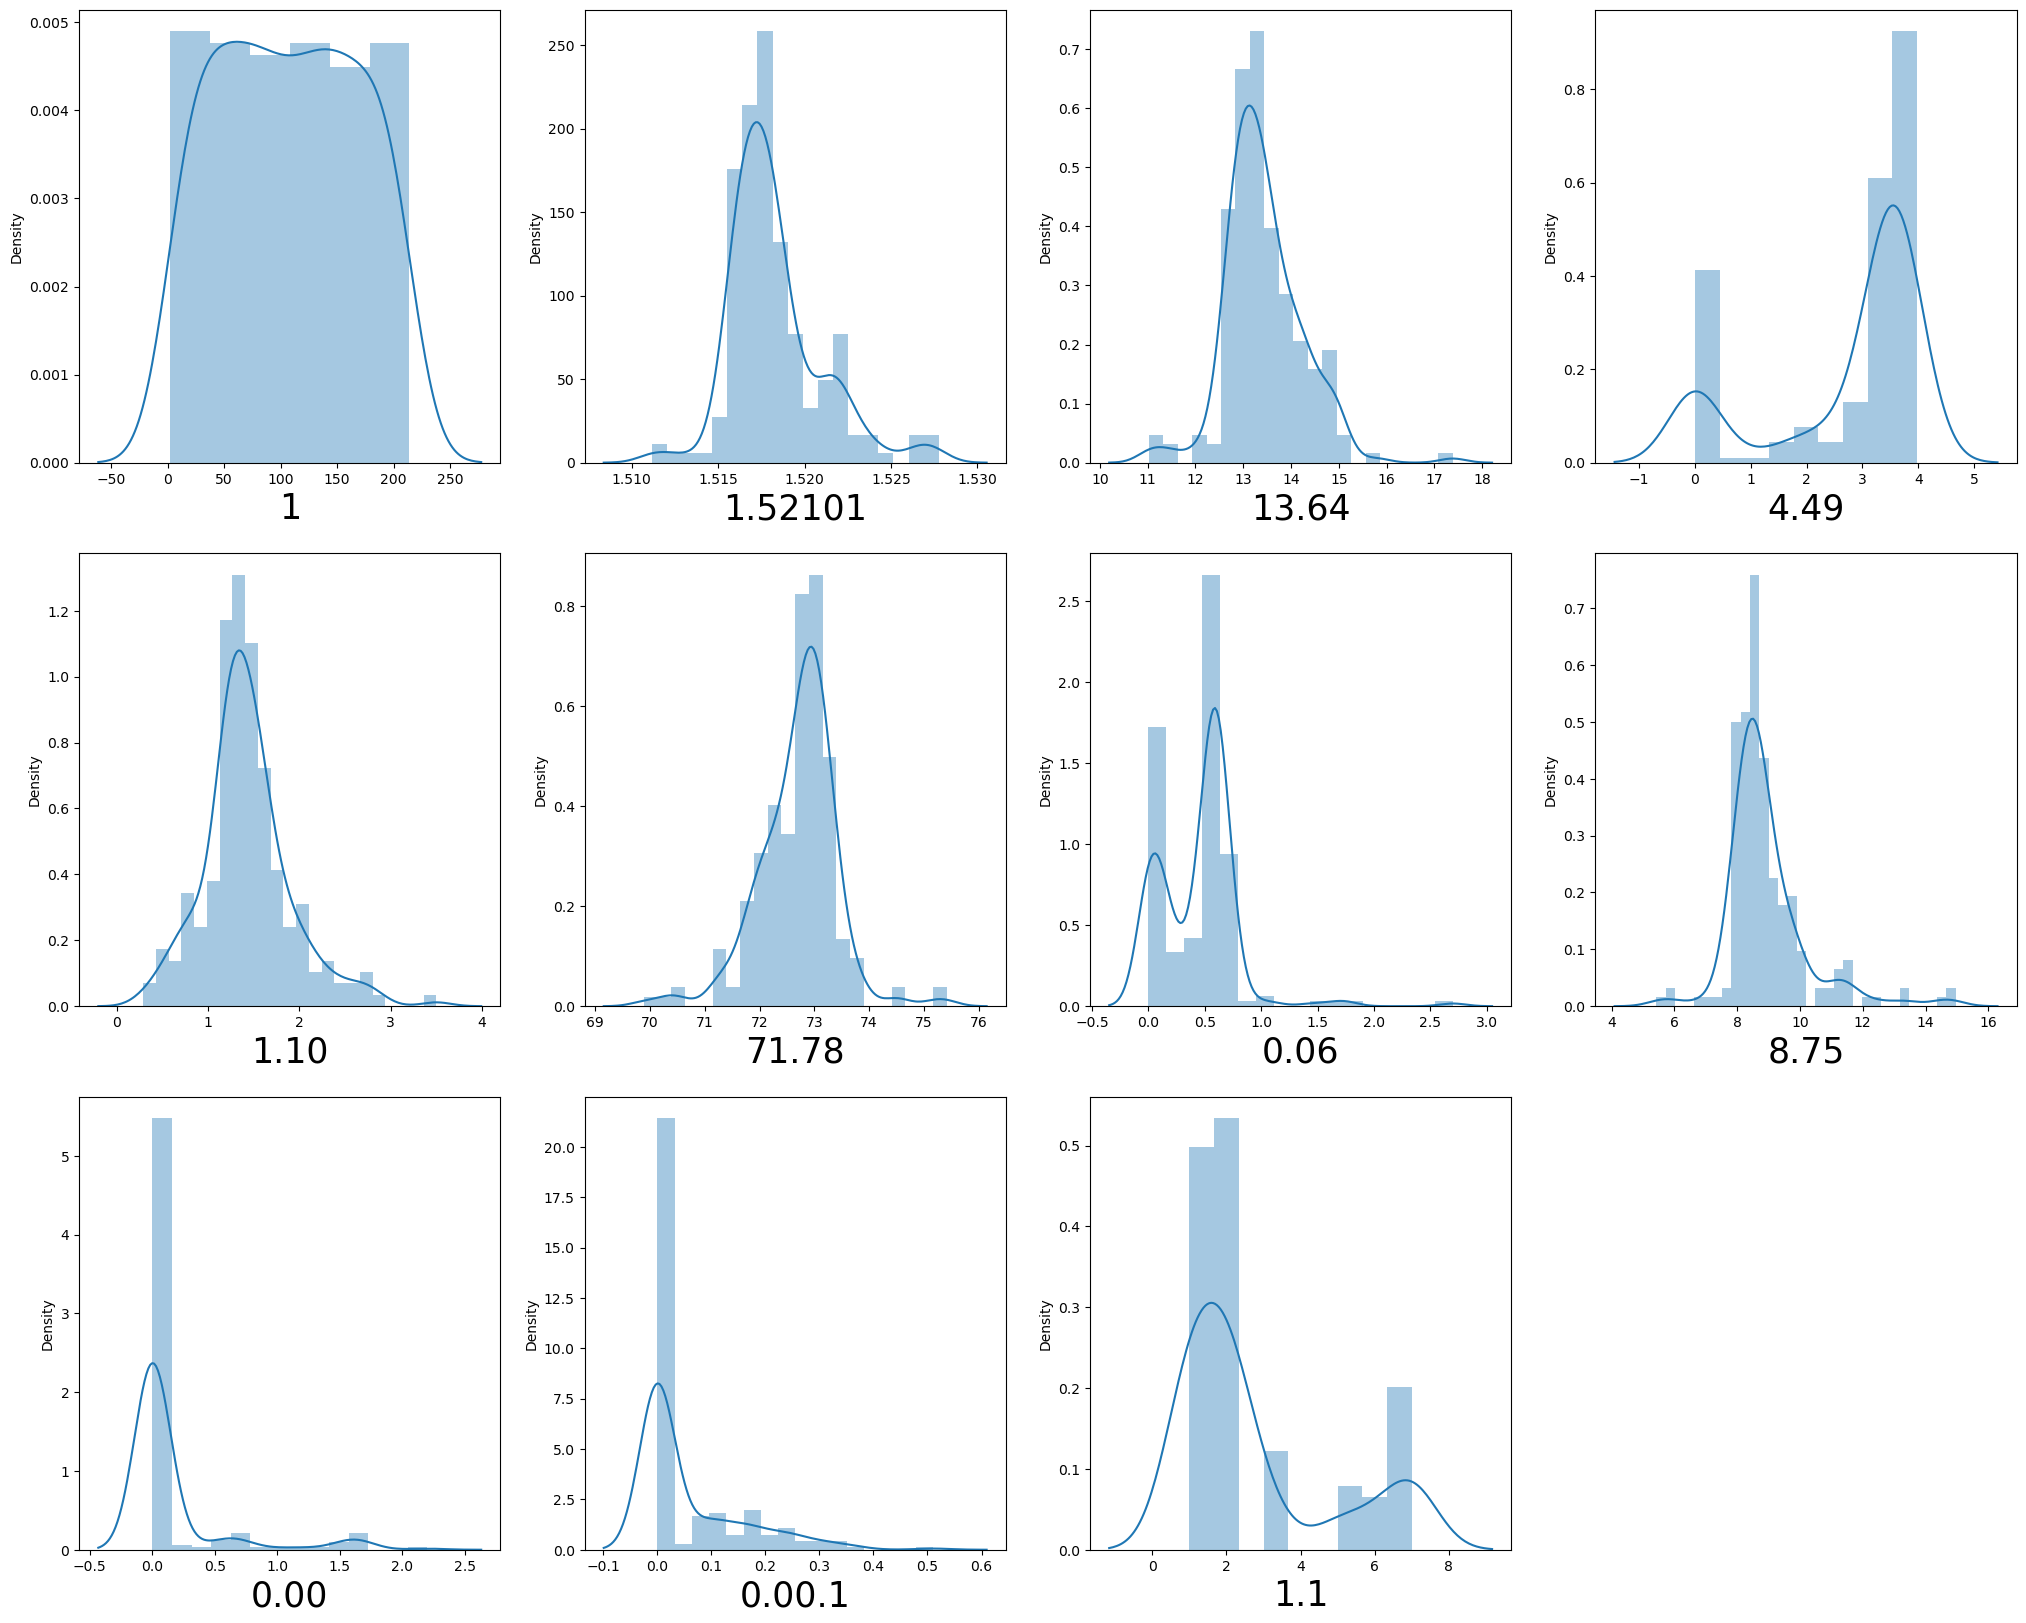

In [209]:
plt.figure(figsize=(25,20))
plot=1

for column in df:
   if plot<=12:
       a=plt.subplot(3,4,plot)
       sns.distplot(df[column])
       plt.xlabel(column, fontsize=25)
    
   plot +=1 
plt.show()

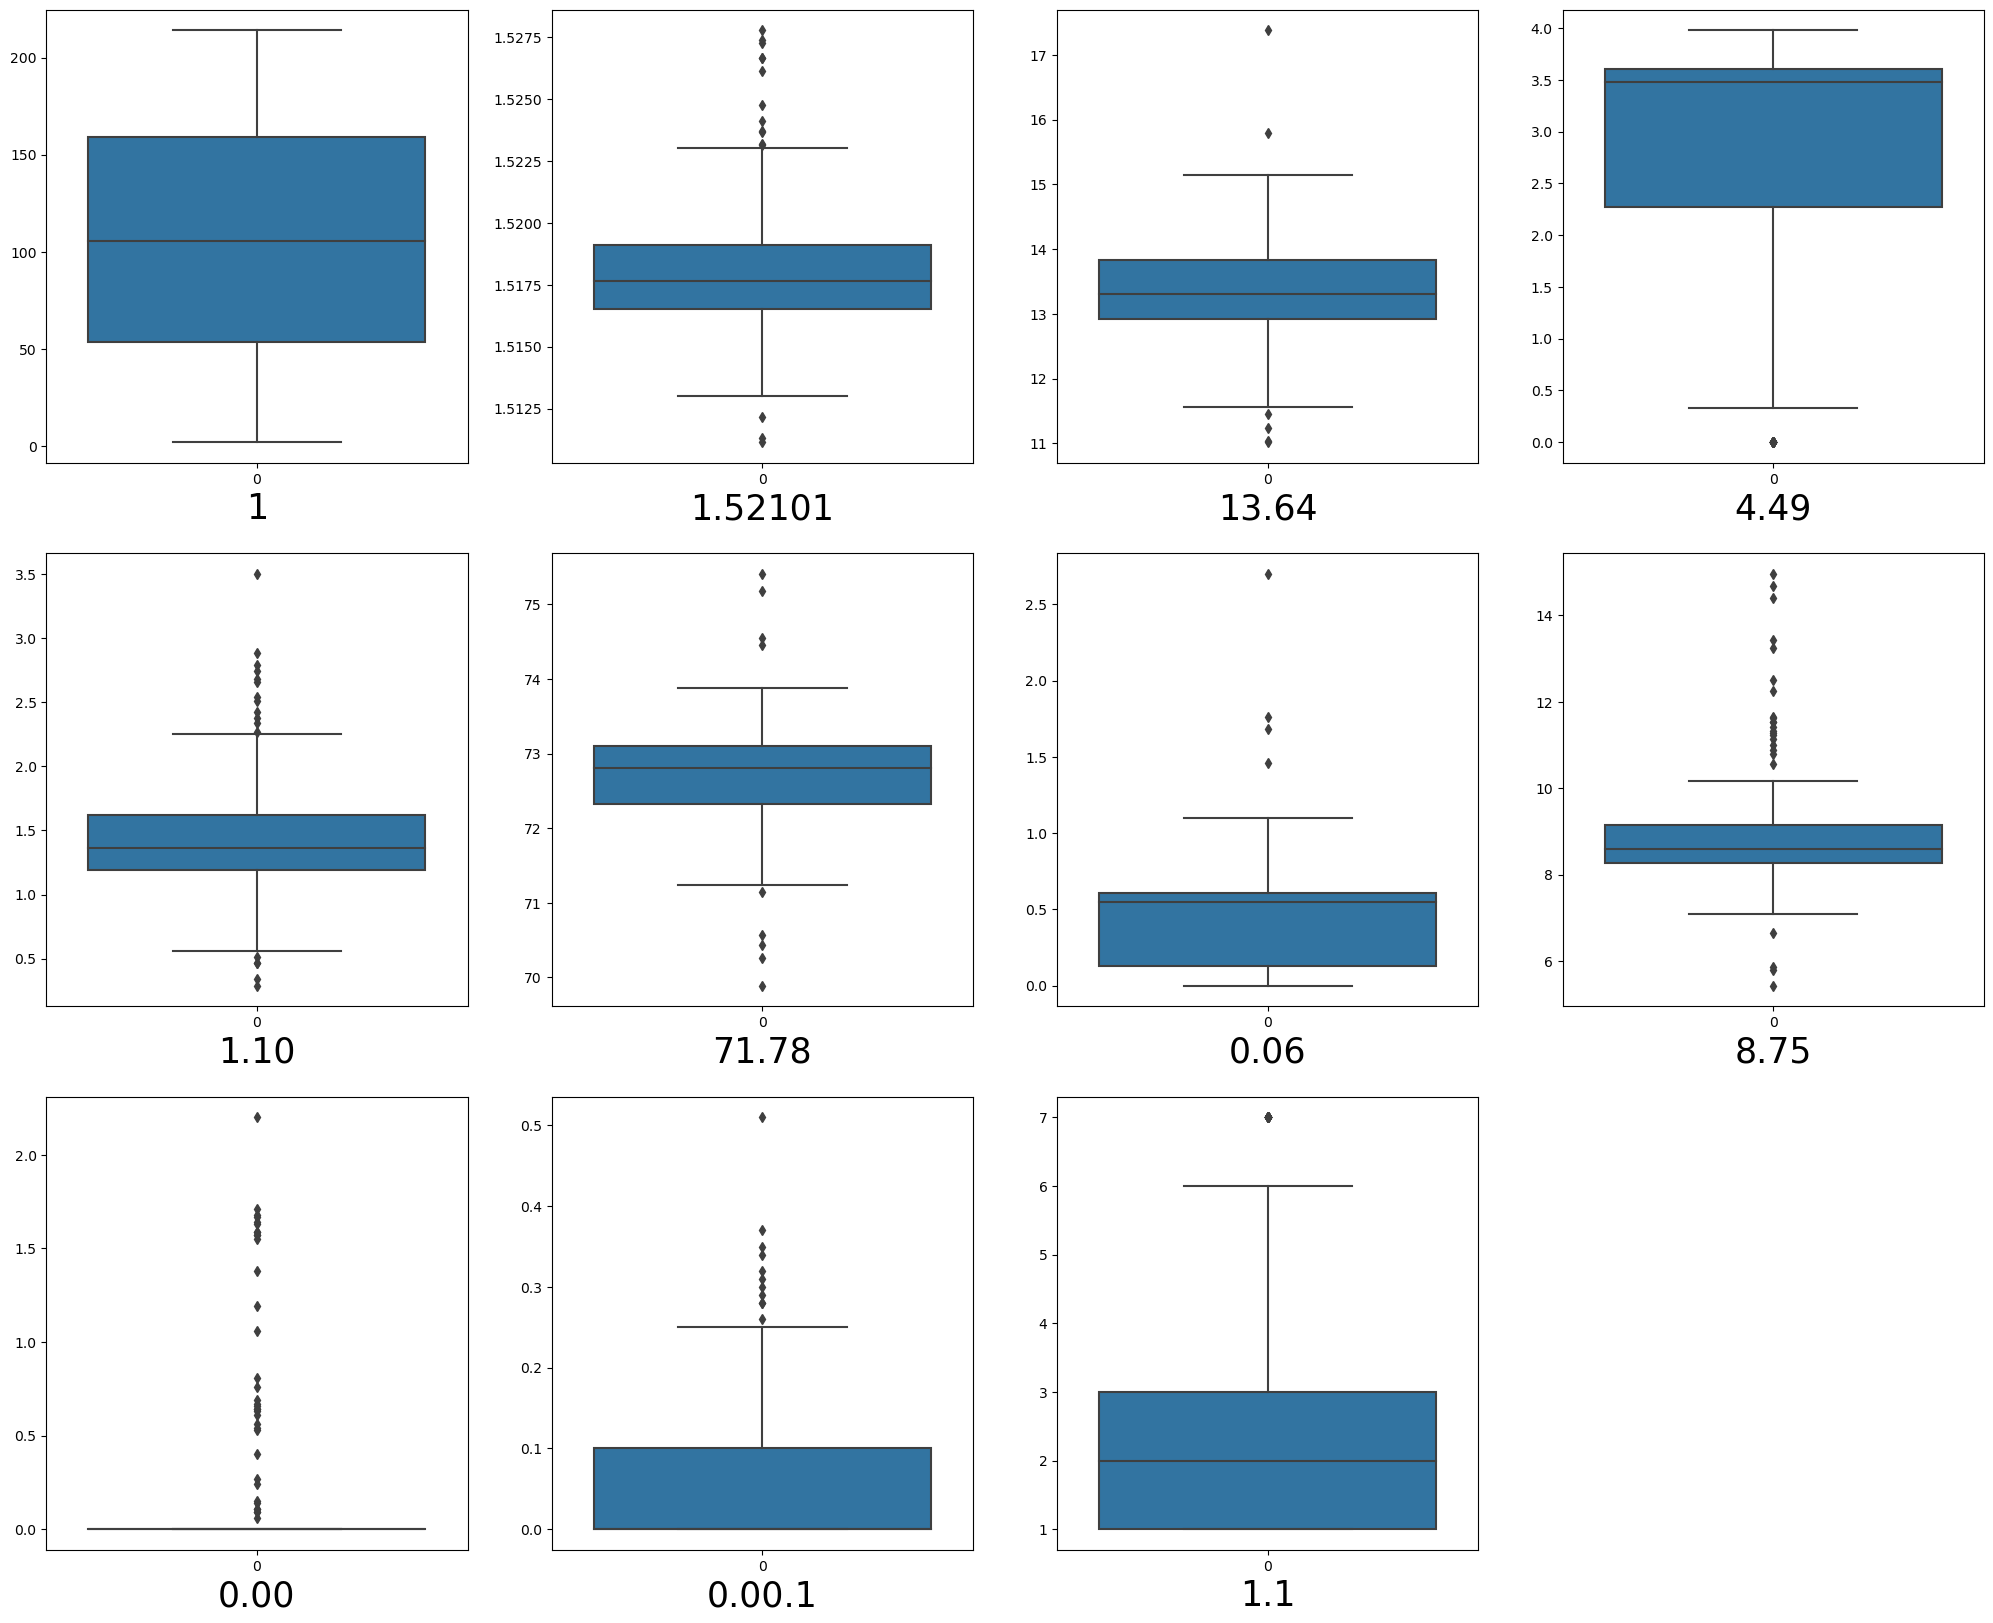

In [210]:
plt.figure(figsize=(25,20))
plot=1

for column in df:
   if plot<=12:
       a=plt.subplot(3,4,plot)
       sns.boxplot(df[column])
       plt.xlabel(column, fontsize=25)
    
   plot +=1 
plt.show()

In [211]:
# Let's remove outlier in  alcohol, total sulphur dioxide using inter quantile range method:


In [212]:
q3=df.quantile(0.75)
q3


1          159.25000
1.52101      1.51912
13.64       13.84000
4.49         3.60250
1.10         1.62000
71.78       73.10000
0.06         0.61000
8.75         9.15750
0.00         0.00000
0.00.1       0.10000
1.1          3.00000
Name: 0.75, dtype: float64

In [213]:
q1=df.quantile(0.25)
q1

1          53.750000
1.52101     1.516528
13.64      12.922500
4.49        2.270000
1.10        1.190000
71.78      72.330000
0.06        0.127500
8.75        8.262500
0.00        0.000000
0.00.1      0.000000
1.1         1.000000
Name: 0.25, dtype: float64

In [214]:
iqr=q3-q1
iqr

1          105.500000
1.52101      0.002592
13.64        0.917500
4.49         1.332500
1.10         0.430000
71.78        0.770000
0.06         0.482500
8.75         0.895000
0.00         0.000000
0.00.1       0.100000
1.1          2.000000
dtype: float64

In [215]:
ninth= (q3[8] + (1.5 * iqr[8]))
print(ninth)

0.0


In [216]:
row=df['0.00']

In [217]:
index= np.where(row>ninth)
print(index)
df= df.drop(df.index[index])
print(df.shape)
df.reset_index()

(array([ 31,  35,  60,  98,  99, 125, 138, 139, 158, 160, 169, 180, 181,
       184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 197,
       198, 199, 200, 201, 202, 203, 204, 205, 206, 207], dtype=int64),)
(172, 11)


,index,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...
167,182,184,1.51969,14.56,0.00,0.56,73.48,0.00,11.22,0.0,0.00,6
168,183,185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
169,186,188,1.52315,13.44,3.34,1.23,72.38,0.60,8.83,0.0,0.00,7
170,187,189,1.52247,14.86,2.20,2.06,70.26,0.76,9.76,0.0,0.00,7


In [218]:
seventh= (q3[6] + (1.5 * iqr[6]))
print(seventh)

1.33375


In [219]:
row1=df['0.06']

In [220]:
index= np.where(row1>seventh)
print(index)
df= df.drop(df.index[index])
print(df.shape)
df.reset_index()

(array([171], dtype=int64),)
(171, 11)


,index,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...
166,181,183,1.51916,14.15,0.00,2.09,72.74,0.00,10.88,0.0,0.00,6
167,182,184,1.51969,14.56,0.00,0.56,73.48,0.00,11.22,0.0,0.00,6
168,183,185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
169,186,188,1.52315,13.44,3.34,1.23,72.38,0.60,8.83,0.0,0.00,7


In [221]:
eighth= (q3[7] + (1.5 * iqr[7]))
print(eighth)

10.500000000000004


In [222]:
row2=df['8.75']

In [223]:
index= np.where(row2>eighth)
print(index)
df= df.drop(df.index[index])
print(df.shape)
df.reset_index()

(array([ 97,  98,  99, 100, 101, 102, 103, 104, 120, 121, 122, 152, 153,
       154, 156, 157, 158, 159, 166, 167], dtype=int64),)
(151, 11)


,index,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...
146,179,181,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,6
147,180,182,1.51888,14.99,0.78,1.74,72.50,0.00,9.95,0.0,0.00,6
148,183,185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
149,186,188,1.52315,13.44,3.34,1.23,72.38,0.60,8.83,0.0,0.00,7


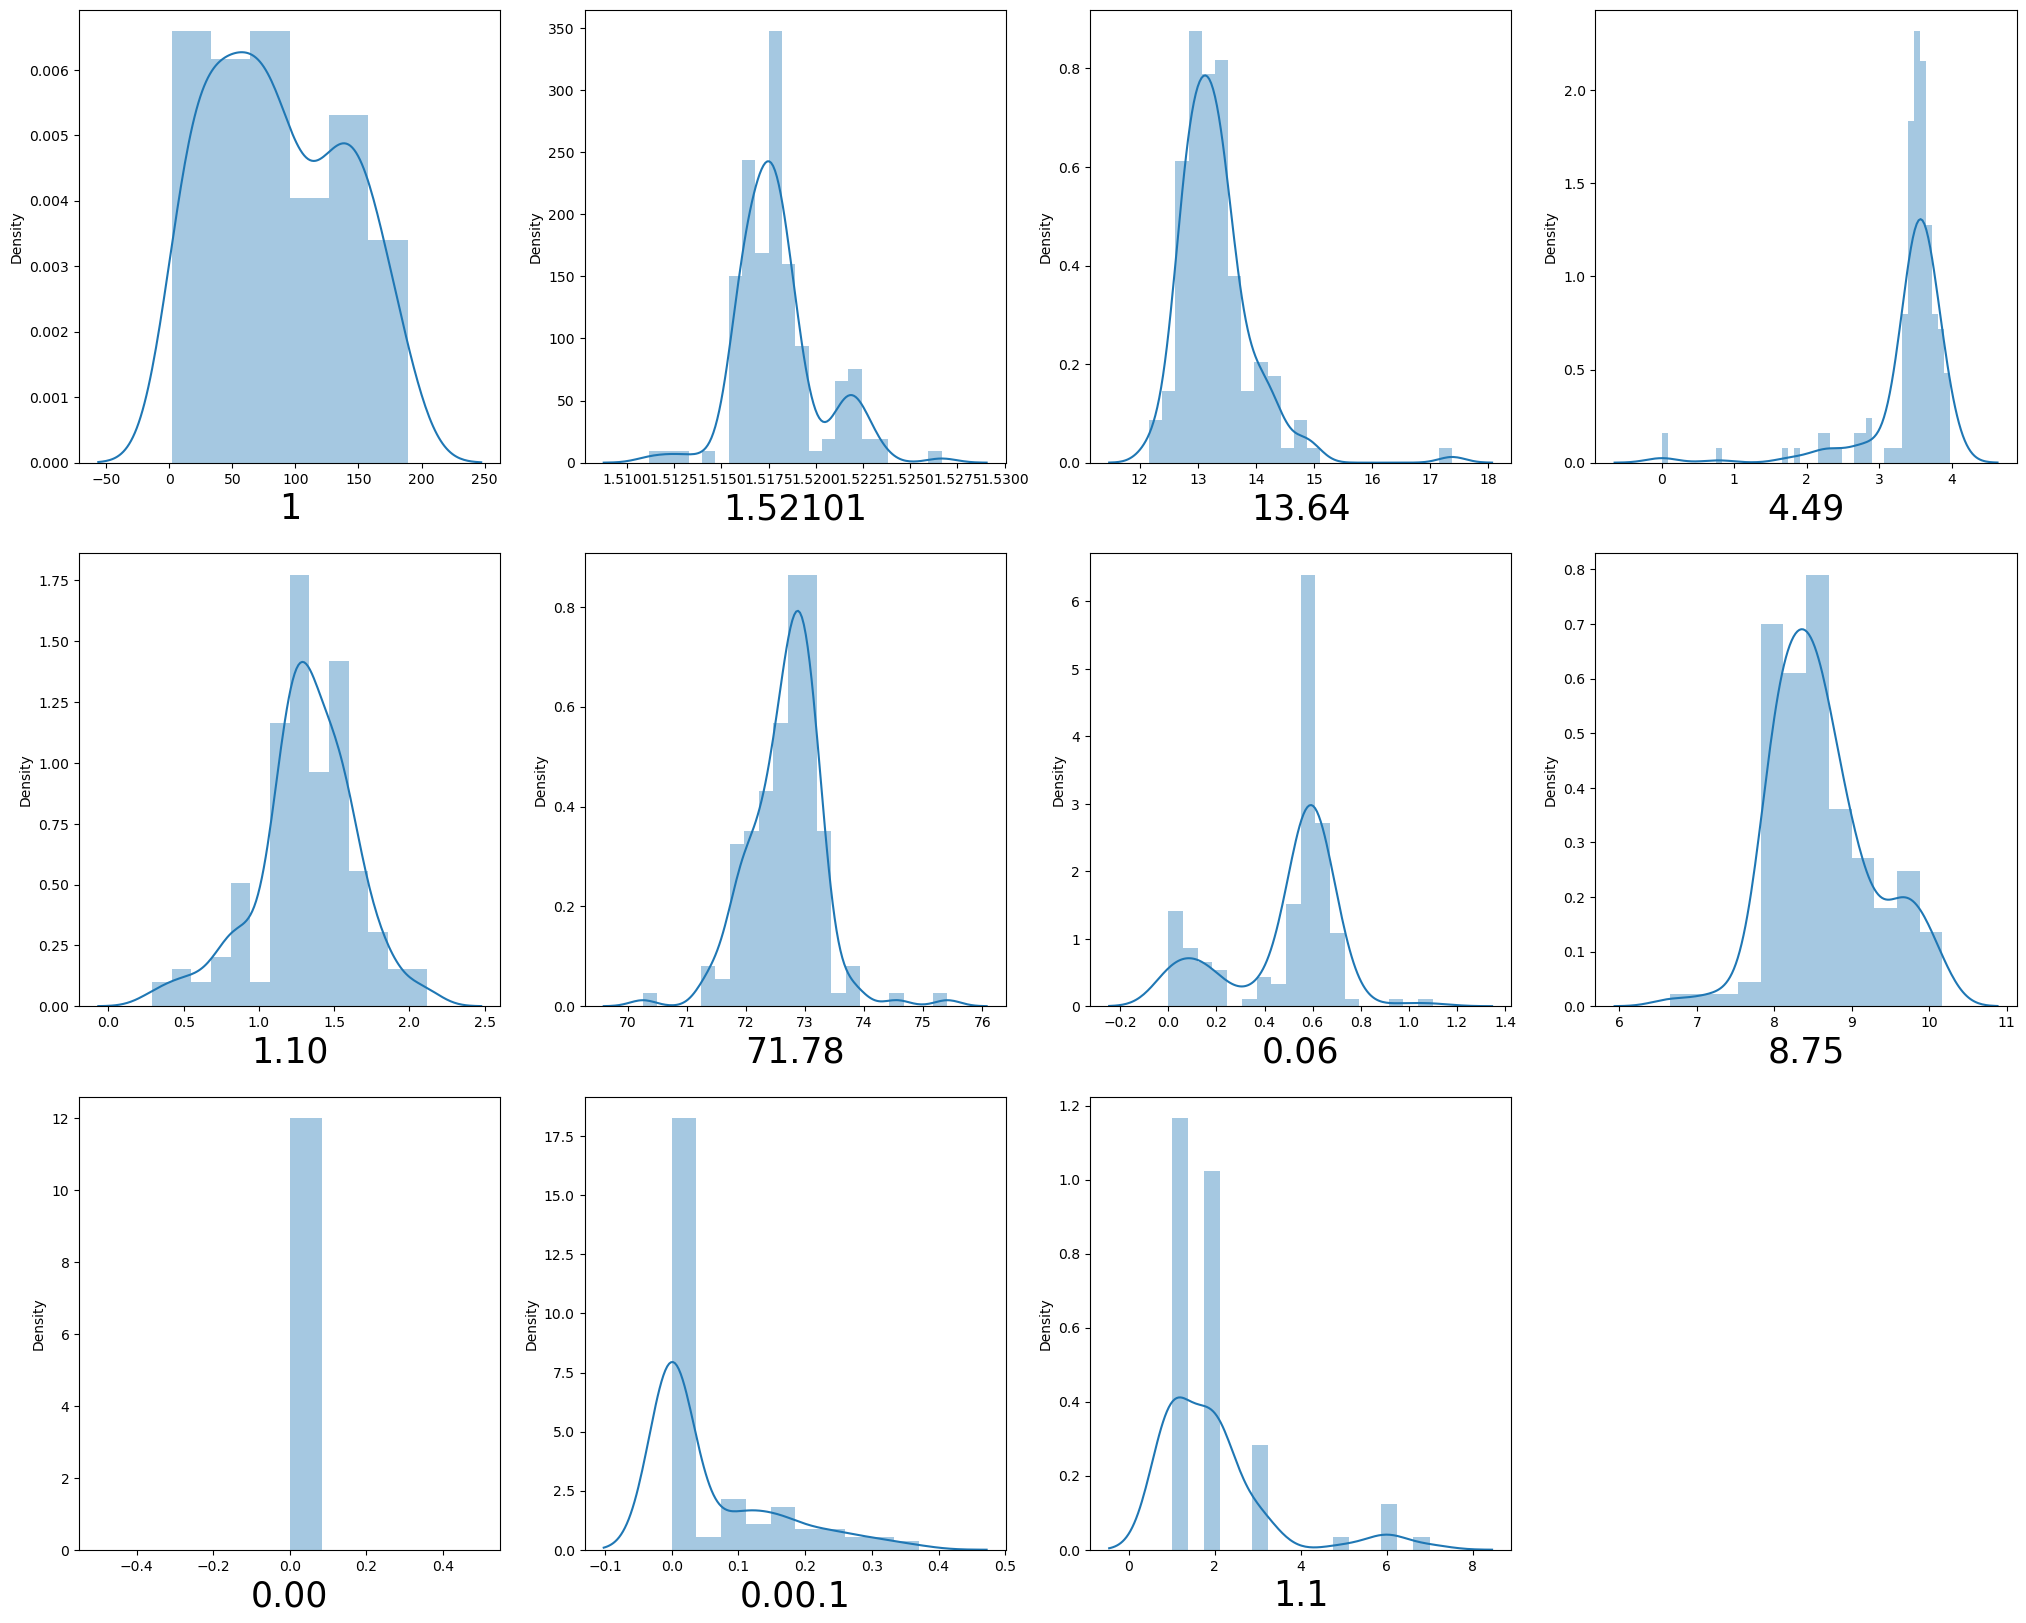

In [225]:
plt.figure(figsize=(25,20))
plot=1

for column in df:
   if plot<=12:
       a=plt.subplot(3,4,plot)
       sns.distplot(df[column])
       plt.xlabel(column, fontsize=25)
    
   plot +=1 
plt.show()

In [130]:
# separating features and labels

In [226]:
x=df.drop(columns=['1.1'])
y=df['1.1']
y

0      1
1      1
2      1
3      1
4      1
      ..
179    6
180    6
183    6
186    7
187    7
Name: 1.1, Length: 151, dtype: int64

In [37]:
 # 1 is for Window Glass and 0 for Not window

In [227]:
Y = y.apply(lambda y_value:1 if y_value<=4 else 0)
Y

0      1
1      1
2      1
3      1
4      1
      ..
179    0
180    0
183    0
186    0
187    0
Name: 1.1, Length: 151, dtype: int64

In [228]:
y.value_counts()

1    66
2    58
3    16
6     7
5     2
7     2
Name: 1.1, dtype: int64

In [125]:
#model building

In [231]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.30, random_state=40)


In [232]:
def score(model,x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred=model.predict(x_train)
        print('Train result')
        print(f"Accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train==False:
        pred=model.predict(x_test)
        print('Test result')
        print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
        print('report',classification_report(y_test,pred,digits=2))

In [233]:
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train) 

DecisionTreeClassifier()

In [234]:
score(tree,x_train, x_test, y_train, y_test, train=True)
score(tree,x_train, x_test, y_train, y_test, train=False)

Train result
Accuracy score:100.00%
Test result
Accuracy score:91.30%
report               precision    recall  f1-score   support

           1       0.95      1.00      0.98        21
           2       0.81      0.93      0.87        14
           3       1.00      0.67      0.80         9
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1

    accuracy                           0.91        46
   macro avg       0.95      0.92      0.93        46
weighted avg       0.92      0.91      0.91        46



In [235]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

In [236]:
random_model=RandomForestClassifier()
random_model.fit(x_train,y_train) 

RandomForestClassifier()

In [237]:
score(random_model,x_train, x_test, y_train, y_test, train=True)
score(random_model,x_train, x_test, y_train, y_test, train=False)

Train result
Accuracy score:100.00%
Test result
Accuracy score:82.61%
report               precision    recall  f1-score   support

           1       0.91      1.00      0.95        21
           2       0.67      0.86      0.75        14
           3       1.00      0.44      0.62         9
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1

    accuracy                           0.83        46
   macro avg       0.72      0.66      0.66        46
weighted avg       0.84      0.83      0.81        46



In [240]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [241]:
score(knn,x_train, x_test, y_train, y_test, train=True)
score(knn,x_train, x_test, y_train, y_test, train=False)

Train result
Accuracy score:88.57%
Test result
Accuracy score:82.61%
report               precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       0.70      1.00      0.82        14
           3       0.60      0.33      0.43         9
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.83        46
   macro avg       0.46      0.47      0.45        46
weighted avg       0.79      0.83      0.79        46



In [242]:
from sklearn.svm import SVC
params = {'n_estimators':[12,15],'criterion':['entropy','gini'],'max_depth':[10,5],'min_samples_split':[10,17],
         'min_samples_leaf':[4,6]}
grd=GridSearchCV(random_model,param_grid=params)
grd.fit(x_train,y_train)
print('best',grd.best_params_)

best {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 15}


In [243]:
random_model=grd.best_estimator_
random_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=6,
                       min_samples_split=10, n_estimators=15)

In [244]:
score(random_model,x_train, x_test, y_train, y_test, train=True)
score(random_model,x_train, x_test, y_train, y_test, train=False)

Train result
Accuracy score:93.33%
Test result
Accuracy score:82.61%
report               precision    recall  f1-score   support

           1       1.00      0.95      0.98        21
           2       0.64      1.00      0.78        14
           3       1.00      0.33      0.50         9
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1

    accuracy                           0.83        46
   macro avg       0.73      0.66      0.65        46
weighted avg       0.87      0.83      0.80        46



In [ ]:
#Question 2 answer-

In [252]:
df2=pd.read_csv("F:\Grades.csv")
df2


,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [253]:
# Here we can drop Seat No. column because region does not affects the outcome
df2=df2.drop(columns='Seat No.',axis=1)


In [254]:
df2

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [255]:
#No null present verifying
df2.isnull().sum()


PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [256]:
def fill(row):
    modes = row.mode()
    if len(modes) > 0:
        return row.fillna(modes[0])
    else:
        return row

df2 = df2.apply(fill, axis=1)
df2

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [257]:
df2.isnull().sum()


PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [259]:
df2.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [262]:
#Let's try imputers and encoders for changing datatype
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
from sklearn.preprocessing import OneHotEncoder

In [263]:
from sklearn.preprocessing import LabelEncoder
for col in df2.columns:
    label = LabelEncoder()
    df2[col] = label.fit_transform(df2[col])
    

In [264]:
df2

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,72
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,48
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,409
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,33
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,2,2,0,0,0,4,4,3,0,459
567,1,0,0,0,0,0,0,2,0,0,...,4,4,0,0,2,3,2,6,2,457
568,3,0,2,4,0,0,0,0,0,3,...,2,3,0,4,0,6,4,2,2,369
569,0,4,9,0,9,10,5,8,5,8,...,9,3,3,8,9,6,3,5,6,70


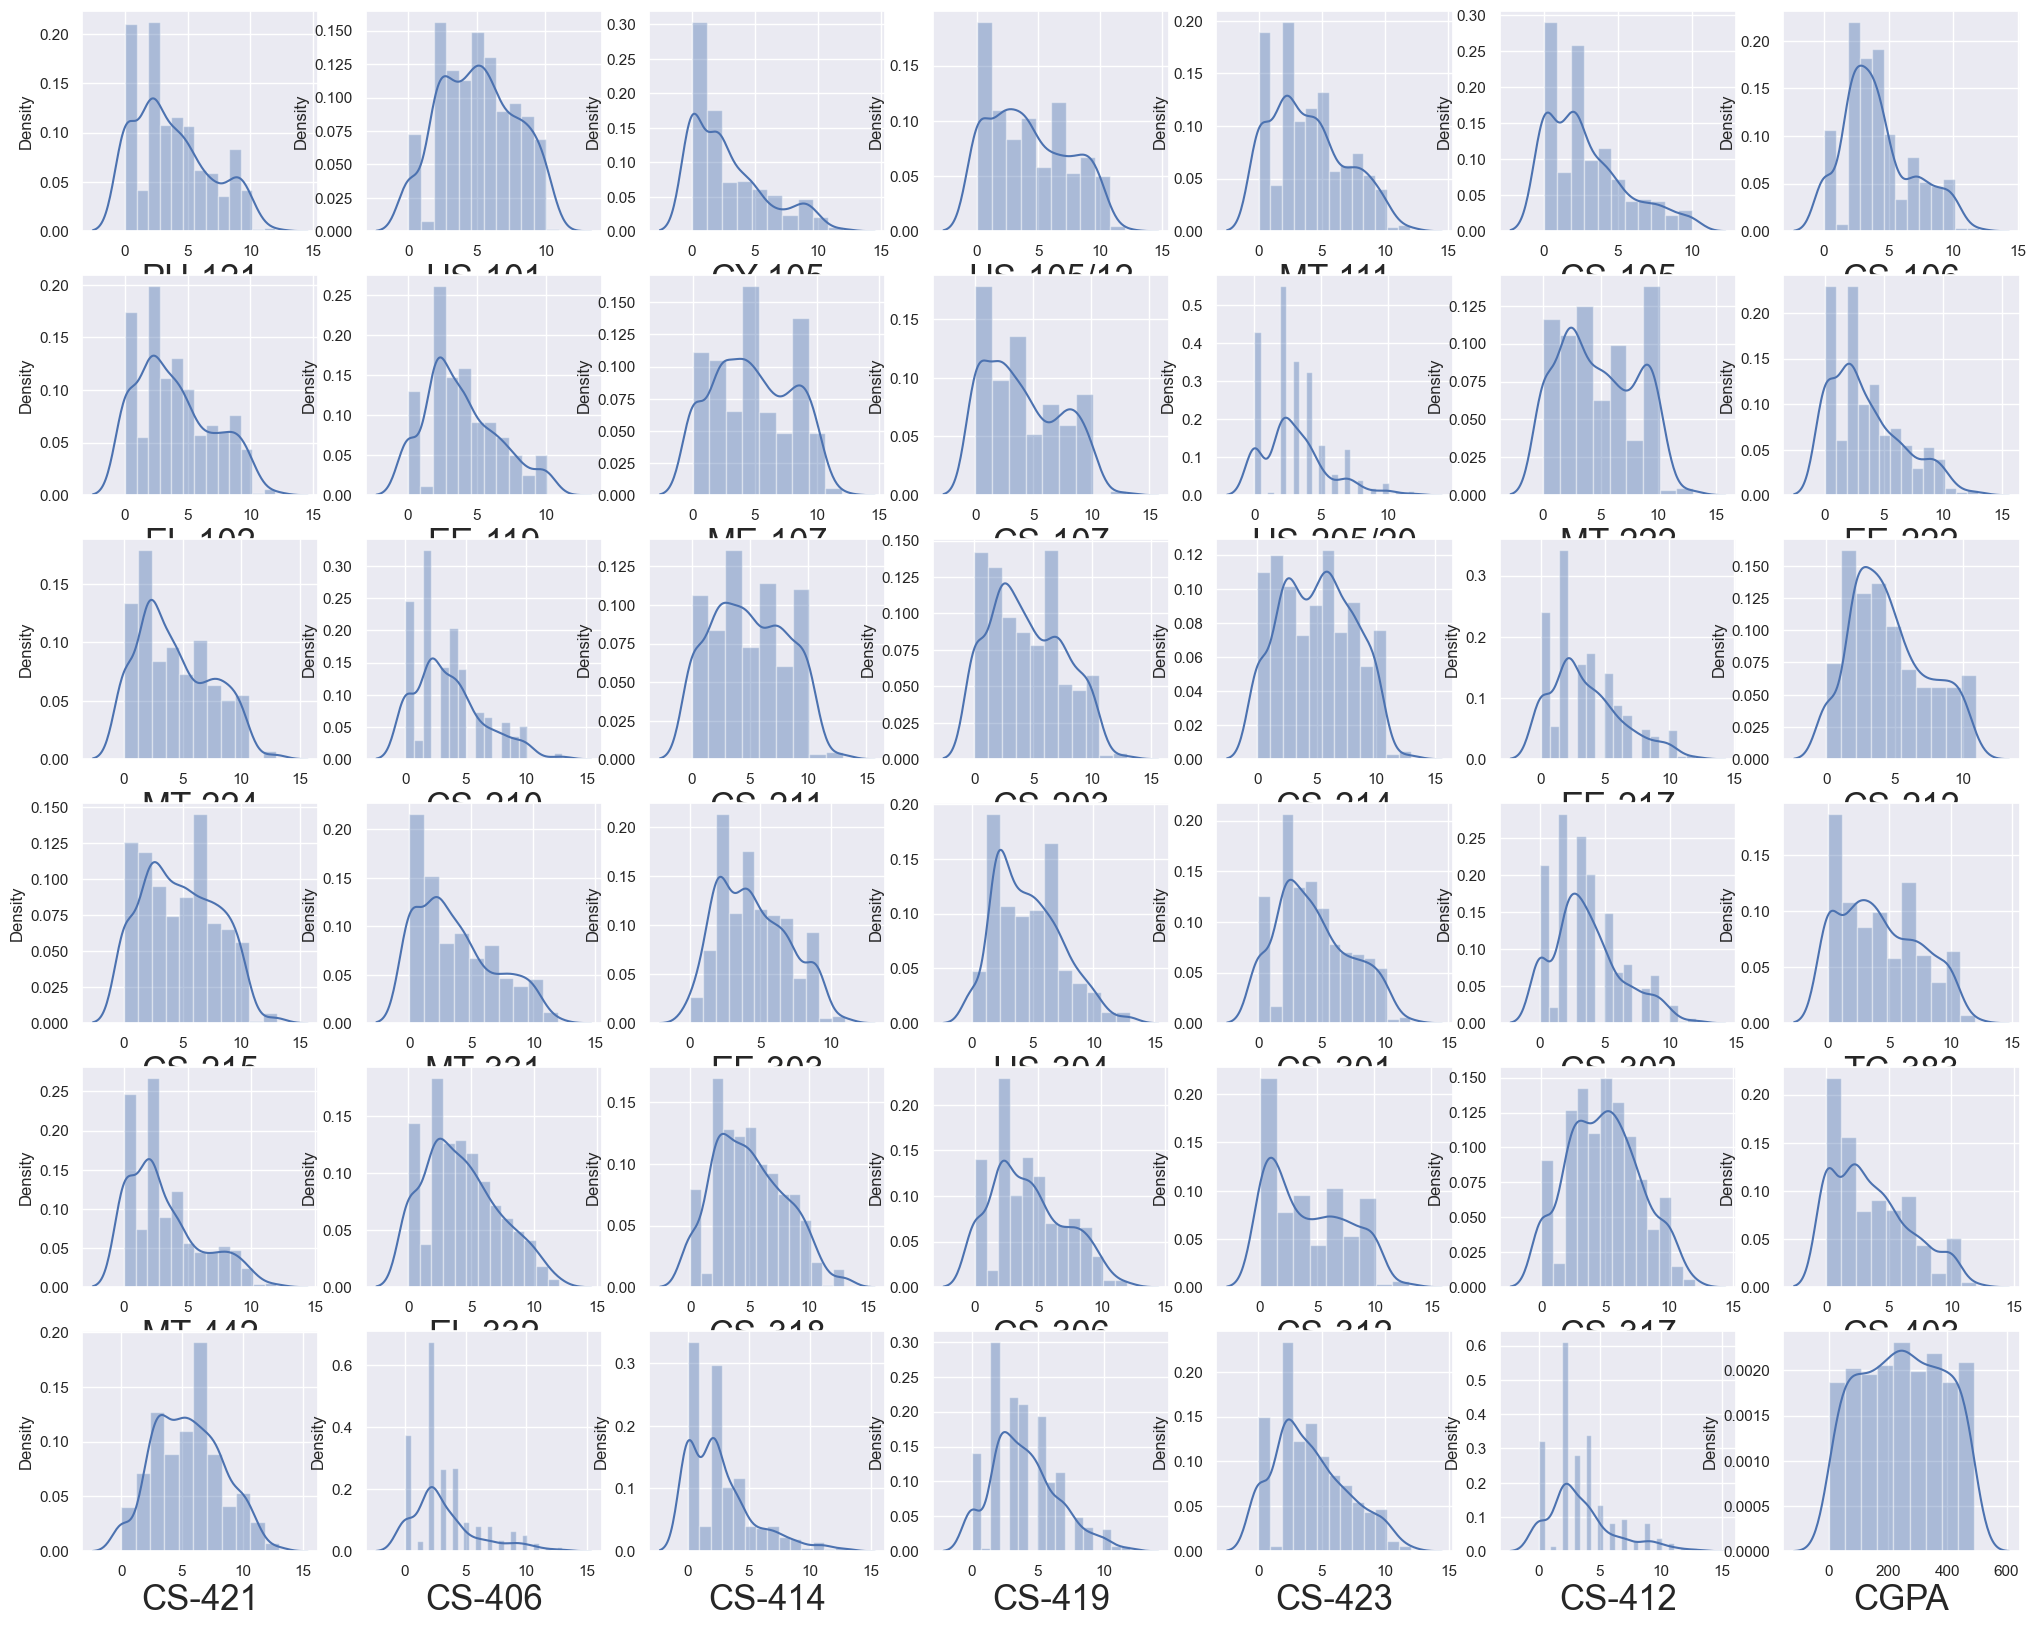

In [265]:
plt.figure(figsize=(25,20))
plot=1

for column in df2:
   if plot<=42:
       a=plt.subplot(6,7,plot)
       sns.distplot(df2[column])
       plt.xlabel(column, fontsize=25)
    
   plot +=1 
plt.show()

In [266]:
x1=df2.drop(columns=['CGPA'])
y1=df2['CGPA']



In [ ]:
#Building Model

In [267]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.20, random_state = 8)


In [268]:
reg = LinearRegression()
reg.fit(x1_train.values, y1_train.values)


LinearRegression()

In [269]:
y1_pred = reg.predict(x1_train.values)

In [270]:
r2_ = metrics.r2_score(y1_train, y1_pred)

print('R squared value: ',r2_)

R squared value:  0.9545113664379317


In [271]:
from sklearn.ensemble import RandomForestRegressor
rfmodel=RandomForestRegressor(random_state=30,n_estimators=90)
rfmodel.fit(x1_train,y1_train)

RandomForestRegressor(n_estimators=90, random_state=30)

In [272]:
y2_pred = rfmodel.predict(x1_train.values)

In [273]:
r2= metrics.r2_score(y1_train, y2_pred)

print('R squared value: ',r2)

R squared value:  0.9929630286174026
